In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [99]:
# Load data
x_train = np.load("./dataset/x_train.npy")
y_train = np.load("./dataset/y_train.npy")
x_test = np.load("./dataset/x_test.npy")
y_test = np.load("./dataset/y_test.npy")

In [100]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [101]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [102]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.

    fold_size = int(x_train.shape[0]/k)
    folds = np.zeros((k, fold_size), dtype=int)
    fold_data = []
    idx = np.arange(x_train.shape[0])
    np.random.shuffle(idx)
    for i in range(k):
        for j in range(fold_size):
            folds[i, j] = idx[i*fold_size + j]
    for i in range(k):
        test = folds[i]
        train = []
        for j in range(k):
            if j != i:
                for ix in folds[j]:
                    train.append(ix)
        train = np.array(train)
        fold_data.append([train, test])
    return fold_data

In [103]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [104]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16], Validation index: [13 17 18 19]
Split: 2, Training index: [ 0  1  2  3  4  5  6  8 10 11 12 13 16 17 18 19], Validation index: [ 7  9 14 15]
Split: 3, Training index: [ 0  2  4  7  8  9 10 11 12 13 14 15 16 17 18 19], Validation index: [1 3 5 6]
Split: 4, Training index: [ 1  2  3  5  6  7  8  9 10 13 14 15 16 17 18 19], Validation index: [ 0  4 11 12]
Split: 5, Training index: [ 0  1  3  4  5  6  7  9 11 12 13 14 15 17 18 19], Validation index: [ 2  8 10 16]


In [105]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [106]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [107]:
np.random.seed(7777)
K = 5
best_c, best_gamma = None, None
C = np.array([0.05, 0.1, 1, 2, 5])
gamma = np.array([0.00005, 0.00008, 0.0001, 0.0002, 0.0005])
rlt_grid_search = np.zeros((len(C), len(gamma)))
# k-Flod Cross Validation and Grid Search
k_fold_data = cross_validation(x_train, y_train, k = K)
k_x_train = []
k_y_train =[]
k_x_test = []
k_y_test = []
for k in range(K):
    split_x1 = []
    split_y1 = []
    split_x2 = []
    split_y2 = []
    for i in k_fold_data[k][0]:
        split_x1.append(x_train[i])
        split_y1.append(y_train[i])
    for i in k_fold_data[k][1]:
        split_x2.append(x_train[i])
        split_y2.append(y_train[i])
    k_x_train.append(np.array(split_x1))
    k_y_train.append(np.array(split_y1))
    k_x_test.append(np.array(split_x2))
    k_y_test.append(np.array(split_y2))

max_score = 0
p = 1
for i in range(C.shape[0]):
    for j in range(gamma.shape[0]):
        k_score = []
        clf = SVC(C = C[i], gamma = gamma[j], kernel = 'rbf')
        for k in range(K):
            clf.fit(k_x_train[k], k_y_train[k])
            k_score.append(clf.score(k_x_test[k], k_y_test[k]))
        k_score = np.array(k_score)
        if np.mean(k_score) > max_score:
            max_score = np.mean(k_score)
            best_c = C[i]
            best_gamma = gamma[j]
        rlt_grid_search[i][j] = np.mean(k_score)
        print("Finish {:.2f}%, max score: {:.5f}".format(p*100/(C.shape[0]*gamma.shape[0]), max_score), end='\r', flush=True)
        p += 1
best_parameters=(best_c, best_gamma)

In [108]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (1.0, 0.0001)


# Q3

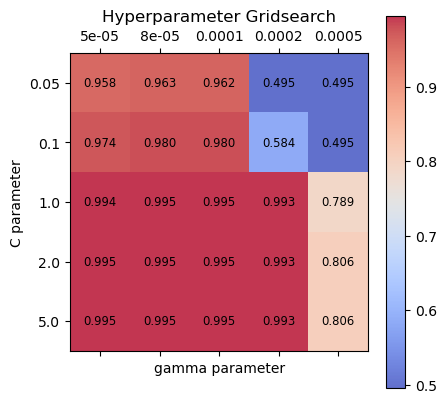

In [109]:
# Plot the grid search results of your SVM
# TODO HERE
yticks = []
for c in C:
    yticks.append(str(c))
xticks = []
for g in gamma:
    xticks.append(str(g))
plt.matshow(rlt_grid_search, cmap = plt.cm.coolwarm, alpha = 0.8)
for i in range(len(C)):
    for j in range(len(gamma)):
        plt.text(x=j, y=i,s ="{:.3f}".format(rlt_grid_search[i, j]), va='center', ha='center', size='small')
plt.title("Hyperparameter Gridsearch")
plt.xticks(np.arange(len(xticks)), xticks)
plt.yticks(np.arange(len(yticks)), yticks)
plt.xlabel("gamma parameter")
plt.ylabel("C parameter")
plt.colorbar()
plt.show()

## Q4

In [110]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
